#Индийские стартапы-единороги 2023 г. Последнее обновление
##Изучим ландшафт индийских единорогов: обновленный набор данных CSV за июнь 2023 г.

## Цель исследования:
1. Анализ данных о стартапах в Индии и выявление основных тенденций в их развитии.
2. Определить период активного появления стартапов
3. Анализ прибыльности для различных секторов инвестиций
4. Изучение активности инвесторов
5. Картографически визуализировать данные о распределении стартапов по городам.
6. Выявить ключевые аспекты динамики становления и развития стартапов в Индии.

## ВЫВОДЫ ИССЛЕДОВАНИЯ:
1. В ходе анализа данных об активности стартапов в Индии было выявлено, что основной период их появления на рынке пришелся на 2021-2023 годы, с пиком в апреле 2021 года, когда открылось 8 новых стартапов. Это указывает на активную динамику развития предпринимательства в регионе.

2. При анализе прибыльности для различных секторов инвестиций были выявлены секторы с наибольшим стартовым капиталом, такие как Fintech, SaaS и Commerce, а также те, в которых наблюдалась наибольшая дельта оценочной стоимости, например, сектор Commerce с разницей в 54.948.

3. Исследование активности инвесторов позволило выявить топ-5 инвесторов, среди которых Tiger Global, Tencent, и SoftBank, а также проанализировать годовой рост инвестиций, где преобладали компании, находящиеся на рынке 5-10 лет.

4. Картографическая визуализация данных о распределении стартапов по городам выявила, что основное количество стартапов открывалось в городе Bangalore. Например, Bangalore был лидером по числу открывшихся стартапов.

5. В итоге, основной вывод состоит в том, что стартапы в Индии демонстрируют активное развитие, сектора Fintech, SaaS и Commerce являются одними из наиболее прибыльных, а город Bangalore является основным центром предпринимательства.

## Структура исследования:
1. Импорт таблиц и предобработка данных
2. Работа с датафреймом:
  * Определение периода наиболее активного появления стартапов на рынке
  * Исследование разницы прибыли для каждого сектора инвестиций
  * Исследование активности инвесторов
  * Исследование среднегодовой  прибыли по инвесторам
  * Картографическая визуализация данных
3. Выводы

1. новый столбец - разница прибыли для каждой компании
2. по инвесторам разбить, переделать в лист и сделать статистику по каждму инвестору, запарсить -через f explode  чтобы каждый инвестор отдельно выводился (отдельной строкой, применяется к переменной = лист)
3. среднегодовой прирост по инвесторам (делим на количество лет на рынке)
4. Можно сделать карту по городам (через регулярные выражения преобразовать города - удалить все знаки после / для составления карты)

ВЫВОДЫ:
С начала мы провели предобработку данных, в нашем исходном датафрейме 'Indian Unicorn startups 2023 updated.csv' мы изменили  названия заголовков столбцов, убрали заглавные буквы, привели к типу данных Timestamp
Колонку unicorn['entry’], в которой содержится информация о дате открытия стартапа. Так же мы проверили датафрейм unicorn на наличие дубликатов (не выявили их)

Работа с датафреймом:
1. Мы определили период активного появления стартапов на рынке: это оказался 2021 - 2023 годы, так же мы построили гистограмму, чтобы посмотреть на распределение по месяцам новых стартапов. Безусловным лидером оказался апрель 2021 года когда открылось 8 новых стартапов, второе место разделили август и ноябрь 2021 года.
2. Далее мы исследовали прибыль для каждого сектора инвестиций. Для начала мы создали отдельную колонку delta_val, в которой посчитали разницу между оценочной стоимостью и исходной стоимостью стартапа. Далее мы поработали над секторами, в которых открывались стартапы - собрали сектора в группы и создали столбец sector_groups, после чего вывели 5 секторов с наибольшим стартовым капиталом, а так же 10 секторов с наибольшим количеством стартапов

## 1. Импорт таблиц и предобработка данных

In [ ]:
import pandas as pd
from google.colab import files
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(15, 10)})
import math as mth
import datetime
import matplotlib.cm as cm
import folium
import random

In [ ]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving Indian Unicorn startups 2023 updated.csv to Indian Unicorn startups 2023 updated.csv


In [ ]:
unicorn = pd.read_csv('Indian Unicorn startups 2023 updated.csv')

In [ ]:
unicorn.info()
unicorn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [ ]:
unicorn.columns

Index(['No.', 'Company', 'Sector', 'Entry Valuation^^ ($B)', 'Valuation ($B)',
       'Entry', 'Location', 'Select Investors'],
      dtype='object')

In [ ]:
# в соответствии с pep-8 переименуем названия столбцов:
unicorn.columns = ['no','company','sector', 'entry_val', 'val', 'entry', 'loc', 'select_invest']

# преобразуем тип данных в Timestamp в столбце 'entry':
unicorn['entry'] = pd.to_datetime(unicorn['entry'])

In [ ]:
# проверим данные на наличие дубликатов:
unicorn.duplicated().sum()

0

Вывод: мы проверили датафрейм на частичное отсутствие данных, переименовали столбцы в соответствии с pep-8, ривели к типу данных Timestamp колонку unicorn['entry’], в которой содержится информация о дате открытия стартапа. Явных дубликатов не обнаружили.

### 2. Работа с датафреймом:


#### Определение периода активного появления стартапов на рынке

In [ ]:
# посмотрим сколько всего компаний и секторов:
unicorn_company = unicorn['company'].count()
unicorn_sector = unicorn['sector'].nunique()
print('всего компаний:',  unicorn_company, 'секторов:', unicorn_sector)


всего компаний: 102 секторов: 75


In [ ]:
# минимальная и максимальная дата выхода на рынок
unicorn['entry'].min()

Timestamp('2011-09-01 00:00:00')

In [ ]:
unicorn['entry'].max()

Timestamp('2022-09-01 00:00:00')

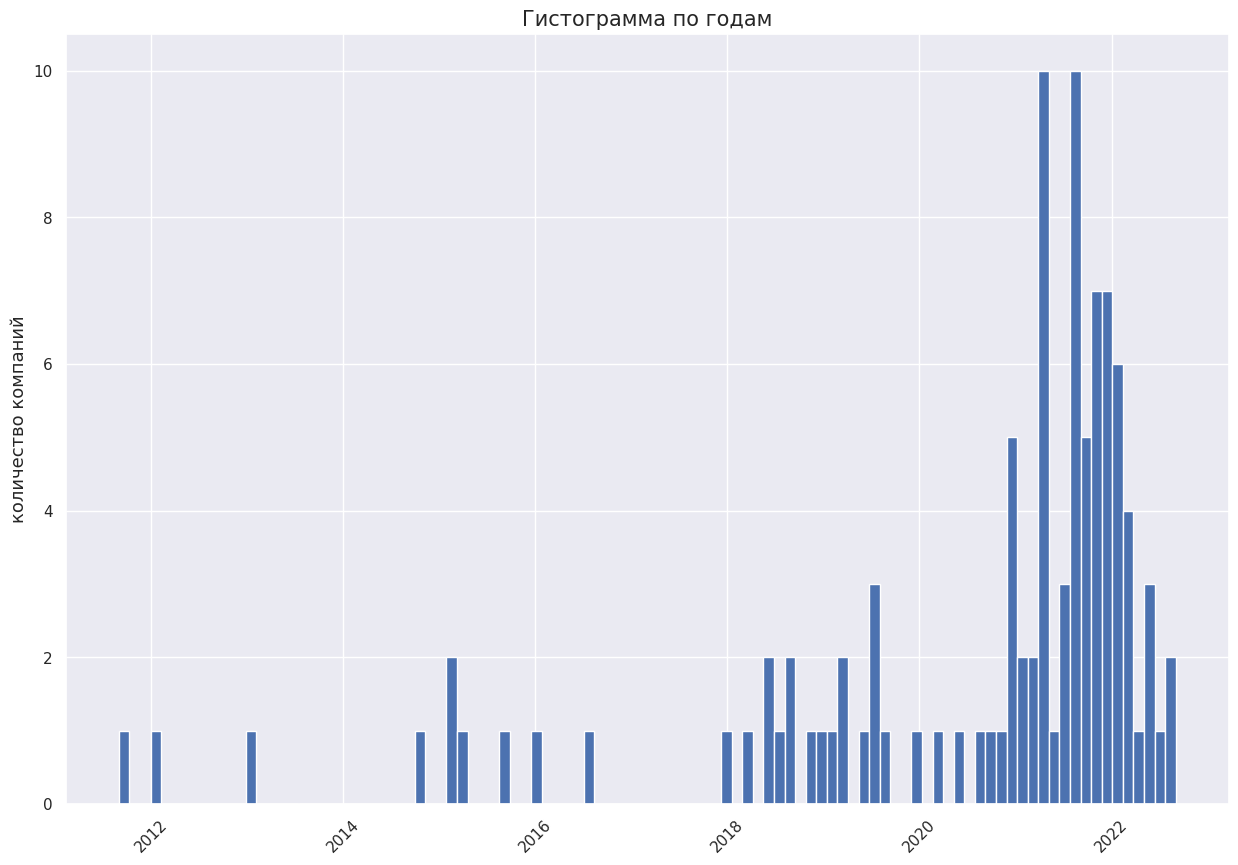

In [ ]:
ax = unicorn['entry'].hist(bins = 100)
plt.title('Гистограмма по годам', size = 15)
plt.ylabel('количество компаний', size = 13)
plt.xticks(rotation=45)
plt.show()

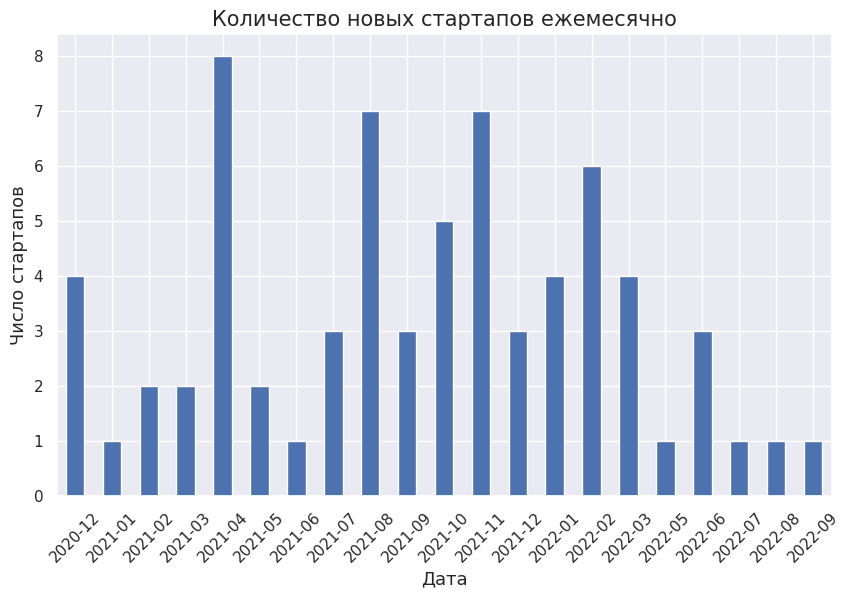

In [ ]:
#рассмотрим подробнее период с 21 по 23 год
# вижу, что это период наиболее активного создания стартапов:
recent_years_new = unicorn[unicorn['entry'] > '2020-11-01']
recent_years_new['entry'] = pd.to_datetime(recent_years_new['entry']).dt.to_period('M')
ax = recent_years_new['entry'].value_counts().sort_index().plot(kind='bar',
                                                                figsize=(10, 6))
plt.title('Количество новых стартапов ежемесячно', size=15)
plt.ylabel('Число стартапов', size=13)
plt.xlabel('Дата', size=13)
plt.xticks(rotation=45)
plt.show()

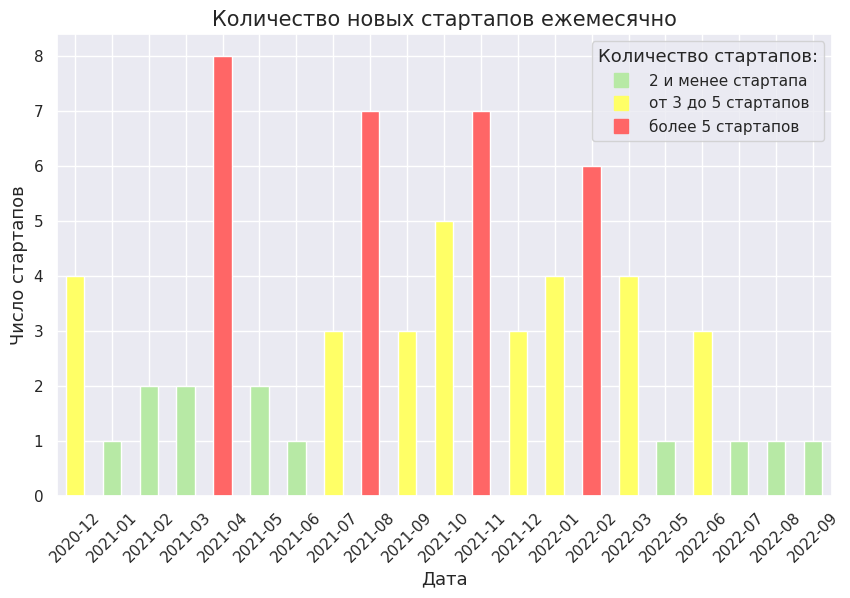

In [ ]:
# альтернативный вид графика:
#рассмотрим подробнее период с 21 по 23 год
# вижу, что это период наиболее активного создания стартапов:
recent_years_new = unicorn[unicorn['entry'] > '2020-11-01']
recent_years_new['entry'] = pd.to_datetime(recent_years_new['entry']).dt.to_period('M')
counts = recent_years_new['entry'].value_counts().sort_index()

# выберем цветовую палитру и подпишем названия:
colors = ['#B7E9A5' if x <= 2 else '#FFFF66' if 2 < x <= 5 else '#FF6666' for
          x in counts]
ax = counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Количество новых стартапов ежемесячно', size=15)
plt.ylabel('Число стартапов', size=13)
plt.xlabel('Дата', size=13)
plt.xticks(rotation=45)

# добавим легенду:
legend_labels = {'#B7E9A5': '2 и менее стартапа', '#FFFF66': 'от 3 до 5 стартапов',
                 '#FF6666': 'более 5 стартапов'}
legend_patches = [plt.plot([], [], marker='s', ms=10, ls="", mec=None,
                           color=color, label=label)[0]  for color, label in
                  legend_labels.items()]
plt.legend(handles=legend_patches, title='Количество стартапов:',
           title_fontsize='13', fontsize='11', loc=1)

plt.show()

Вывод: мы определили период активного появления стартапов на рынке по гистограмме: это оказался 2021 - 2023 годы, точнее апрель, июнь и октябрь 2021. Отдельно на гистограмме я исследовала распределение по месяцам новых стартапов. Безусловным лидером оказался апрель 2021 года6 когда открылось 8 новых стартапов, второе место разделили август и ноябрь 2021 года (по 7 стартапов).

#### Исследование разницы прибыли для каждого сектора инвестиций
Создаем новый датафрейм unicorn_copy и столбец с приростом оценочной стоимости delta_val:

In [ ]:
#создадим новый датафрейм unicorn_copy:
unicorn_copy = unicorn.copy()
unicorn_copy['delta_val'] = unicorn_copy['val'] - unicorn_copy['entry_val']


#посмотрим на компании с наибольшим экономическим приростом:
unicorn_copy.sort_values(by='delta_val', ascending=False).head()

,no,company,sector,entry_val,val,entry,loc,select_invest,delta_val
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",36.6
10,11,BYJUS,Edtech,1.0,22.0,2018-01-01,Bangalore,"Aarin Capital, Sequoia Capital, Lightspeed Ven...",21.0
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,2015-02-01,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",14.3
12,13,Swiggy,Foodtech,1.4,10.7,2018-06-01,Bangalore,"Accel, Elevation Capital, Norwest, Naspers, Te...",9.3
21,22,Dream11,Gaming,1.0,8.0,2019-04-01,Mumbai,"Kalaari Capital, Tencent, Multiples PE, Steadv...",7.0


In [ ]:
#Объединим схожие сектора в группы, создадим столбец sector_groups:
unicorn_copy['sector_groups'] = unicorn_copy['sector']

# посмотрим на уникальные названия секторов:
unicorn_copy['sector'].unique()

array(['Adtech - Mobile Ads', 'E-Commerce', 'SaaS - Analytics',
       'Fintech - Payments & Wallet', 'Mobility - Ride Aggregator',
       'Marketplace - Classifieds', 'Foodtech',
       'Social Media - Messaging', 'Edtech', 'Fintech - Insurance',
       'SaaS - CRM', 'Proptech - Hotel Booking', 'B2B E-Commerce',
       'Fintech - B2B Payments', 'Logistics Services',
       'Logistics Services - Trucks', 'E-Commerce - Groceries', 'Gaming',
       'SaaS - Data Management', 'SaaS - Contract Management',
       'IT Services - Healthcare', 'Mobility - Electric',
       'E-Commerce - Eyewear', 'Fintech - PoS Payment Solutions',
       'E-Commerce - Personal Care & Cosmetics',
       'SaaS - API Development & Testing', 'Fintech - Payment Gateway',
       'Marketplace - Used Cars', 'Fintech - Payments',
       'SaaS - Salon & Spa Management', 'Content - News',
       'Content - Lockscreen', 'Fintech - General Insurance',
       'SaaS - Healthcare Data Analytics',
       'B2B E-Commerce - Cons

In [ ]:
# запишем все уникальные первые слова из названий секторов в лист:
short_names_list = ["Fintech", "Edtech", "Adtech", "SaaS", "Marketplace",
                    "Commerce", "NBFC", "Proptech", "Healthtech",
                    "Interior Design", "Social Media", "Logistics Services",
                    "IT Services", "Content", "Foodtech", "D2C", "Aggregator",
                    "Web3 Infrastructure", "Mobility"]

# для вынесения секторов в группы по названию создадим функцию replace_with_short_name:
def replace_with_short_name(full_name):
    for short_name in short_names_list:
        if short_name in full_name:
            return short_name
    return full_name

unicorn_copy['sector_groups'] = unicorn_copy['sector_groups'].apply(replace_with_short_name)
# этот блок с твоими данными сработает нормально. Но есть нюнас:
# есть компании с сектором: Fintech - Marketplace - SME Lending
# твой скрипт определит ее как Fintech, и компанию Marketplace - Fintech - SME Lending
# также как Fintech, потому что по порядку проверки первым идет Fintech в списке.
# Просто в будущем полезно обращать на такое внимание.


unicorn_copy.head()

,no,company,sector,entry_val,val,entry,loc,select_invest,delta_val,sector_groups
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",0.0,Adtech
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",36.6,Commerce
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,2013-02-01,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",0.5,SaaS
3,4,Snapdeal*,E-Commerce,1.8,2.4,2014-10-01,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",0.6,Commerce
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,2015-02-01,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",14.3,Fintech


На примере сектора Fintech - Marketplace - SME Lending и Aggregator - Logistics Services есть названия секторов, которые включают в себя несколько заголовков групп секторов. Судя по схожим названиям, например Marketplace - Jobs, вижу, что названия сектора определяются не алфавитным порядком, а скорее идут от общего к частному, к уточнению. Поэтому я оставила лишь первое слово/фразу в столбце sector_groups.

In [ ]:
# посмотрим на список уникальных названий групп секторов:
unicorn_copy['sector_groups'].unique()

array(['Adtech', 'Commerce', 'SaaS', 'Fintech', 'Aggregator',
       'Marketplace', 'Foodtech', 'Social Media', 'Edtech', 'Proptech',
       'Logistics Services', 'Gaming', 'IT Services', 'Mobility',
       'Content', 'NBFC', 'Conversational Messaging',
       'Cryptocurrency Exchange', 'D2C', 'Healthtech',
       'Web3 Infrastructure', 'Interior Design'], dtype=object)

In [ ]:
#посмотрим на самые высокие показатели первичных инвестиций по секторам:
unicorn_copy_hist = unicorn_copy.pivot_table(index='sector_groups',
                                             values=['entry_val', 'val'],
                                             aggfunc={'entry_val': 'sum', 'val': 'sum'}).sort_values(by='entry_val', ascending=False)
unicorn_copy_hist.reset_index(inplace=True)
unicorn_copy_hist.head()

,sector_groups,entry_val,val
0,Fintech,30.50,71.000
1,SaaS,22.90,38.500
2,Commerce,21.22,76.168
3,Marketplace,11.40,16.000
4,Web3 Infrastructure,10.00,10.000


In [ ]:
unicorn_sector_name = unicorn_copy.groupby('sector_groups')['sector_groups'].count().sort_values(ascending=False)
unicorn_sector_name.head(10)

sector_groups
Fintech               17
Commerce              16
SaaS                  16
Marketplace            9
Edtech                 7
Logistics Services     6
Healthtech             3
D2C                    3
Foodtech               3
Gaming                 3
Name: sector_groups, dtype: int64

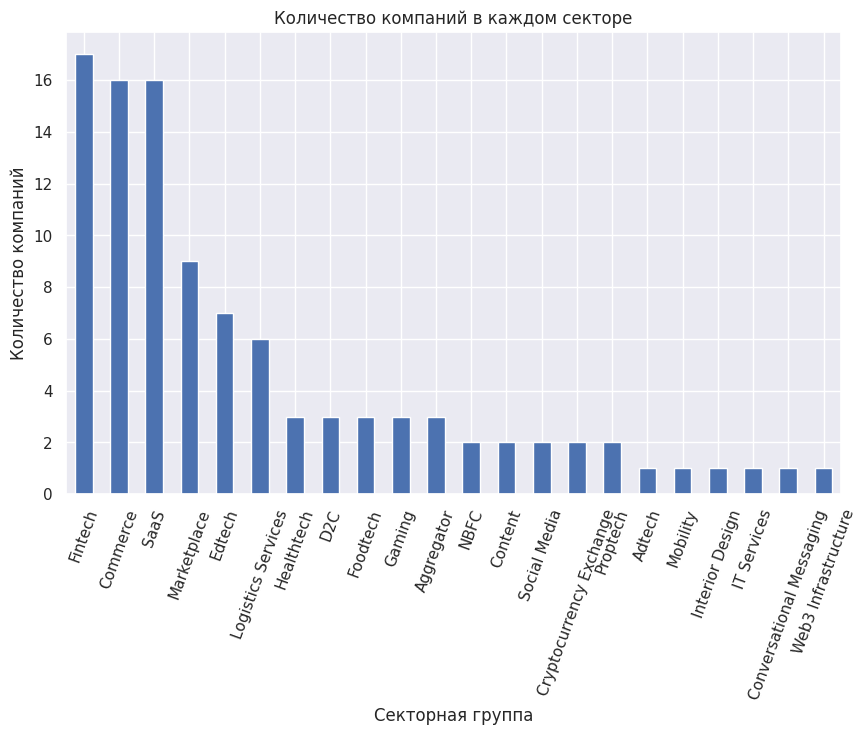

In [ ]:
# Создаем гистограмму
plt.figure(figsize=(10, 6))
unicorn_sector_name.plot(kind='bar')
plt.title('Количество компаний в каждом секторе')
plt.xlabel('Секторная группа')
plt.ylabel('Количество компаний')
# Поворот названий на оси x, чтобы они были читаемыми
plt.xticks(rotation=70)
plt.show()

In [ ]:
unicorn_copy_hist = unicorn_copy_hist

# Строим интерактивную двойную столбчатую гистограмму
fig = px.bar(unicorn_copy_hist, x='sector_groups', y=['entry_val', 'val'], barmode='group')

# Настройка заголовка по центру
fig.update_layout(
    title={
        'text': 'Стартовые инвестиции/итоговая оценка стартапов по секторам',
        'x':0.5,
        'xanchor': 'center'
    }
)

# Настройка подписей осей и заголовка
fig.update_layout(
    xaxis_title='Группы секторов',
    yaxis_title='Сумма инвестиций',
    legend_title='Тип инвестиций'
)


fig.update_traces(name='исходная стоимость', selector=dict(name='entry_val'))
fig.update_traces(name='конечная стоимость', selector=dict(name='val'))


# Настройка названий компаний по оси x
fig.update_layout(xaxis = dict(tickangle = -45))


# Отображение графика
fig.show()

Вывод: я сформировала категории секторов инвестиций и записала их в столбец sector_groups, после чего определила топ-5 секторов по первичным инвестициям, это Fintech, SaaS, Commerce, Marketplace, Web3 Infrastructure. Причем по секторам наибольших разрыв по итоговой оценочной стоимости проектов сектора Fintech (разница в 40.500) и Commerce (разница в 54.948), а у  WEB 3 infrastructure совершенно не поменялась оценочная стоимость как при запуске стартапов сектора, так и через все время наблюдений.
По количеству стартапов в каждом секторе: Лидирующее место занимает Fintech, где существуют 17 компаний, далее Commerce и Saas - по 16 стартапов.
Так же дельта оценочной стоимости среди секторов с низким бюджетом наиболее велика у mobility, Content, Foodtech.

#### Исследование активности инвесторов
Многие стартапы были созданы при поддержке группы инвесторов. Мы создадим новый датафрейм unicorn_invest, в котором разобьем группы инвесторов по одному (для этого создадим столбец single_invest) и исследуем их.

In [ ]:
unicorn_copy.head()

,no,company,sector,entry_val,val,entry,loc,select_invest,delta_val,sector_groups
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",0.0,Adtech
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",36.6,Commerce
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,2013-02-01,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",0.5,SaaS
3,4,Snapdeal*,E-Commerce,1.8,2.4,2014-10-01,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",0.6,Commerce
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,2015-02-01,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",14.3,Fintech


In [ ]:
unicorn_invest = unicorn_copy.copy()
# разделяем строки по запятым
unicorn_invest['single_invest'] = unicorn_invest['select_invest'].str.split(', ')

# создаем для каждого значения свою отдельную строку
unicorn_invest = unicorn_invest.explode('single_invest')

# Переставляем столбцы
unicorn_invest = unicorn_invest[['single_invest', 'company', 'sector',
                                 'entry_val', 'val', 'entry', 'loc',
                                 'select_invest', 'delta_val',
                                 'sector_groups']].reset_index(drop=True)
unicorn_invest.head()


,single_invest,company,sector,entry_val,val,entry,loc,select_invest,delta_val,sector_groups
0,KPCB,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",0.0,Adtech
1,Sherpalo Ventures,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",0.0,Adtech
2,SoftBank,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",0.0,Adtech
3,Accel,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",36.6,Commerce
4,Tiger Global,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",36.6,Commerce


In [ ]:
# Создадим новый датафрейм, в котором для каждого инвестора узнаем сумарную
# прибыль и количество лет на рынке:
# нам интересна не только прибыль инвестора, но и успех проектов,
# в которых он участвовал:

unicorn_invest_growth = unicorn_invest.pivot_table(index='single_invest',
                                                   values=['entry', 'delta_val'],
                                                   aggfunc={'entry': 'min',
                                                            'delta_val': 'sum'})

unicorn_invest_growth.sort_values(by='delta_val', ascending=False).head()

,delta_val,entry
single_invest,,
Tiger Global,100.848,2012-02-01
Tencent,89.600,2012-02-01
SoftBank,66.768,2011-09-01
Naspers,52.800,2012-02-01
Accel,48.400,2012-02-01


In [ ]:
# создадим новый столбец time_gap, в котором посчитаем, сколько лет инвестор
# уже существует на рынке с различными проектами:
end_of_observations = pd.to_datetime('2023-07-01')
unicorn_invest_growth['time_gap'] = (end_of_observations - unicorn_invest_growth['entry']) / pd.Timedelta(days=365.25)
unicorn_invest_growth['time_gap'] = round(unicorn_invest_growth['time_gap'], 2)
unicorn_invest_growth.head()

,delta_val,entry,time_gap
single_invest,,,
Lightrock India,0.0,2022-03-01,1.33
The Raine Group,0.0,2022-03-01,1.33
3ONE4 Capital,0.3,2021-10-01,1.75
A91 Partners,2.1,2021-01-01,2.49
ABC World Asia,0.0,2021-09-01,1.83


In [ ]:
# создадим новый столбец growth_per_year:
unicorn_invest_growth['growth_per_year'] = unicorn_invest_growth['delta_val'] / unicorn_invest_growth['time_gap']
unicorn_invest_growth['growth_per_year'] = round(unicorn_invest_growth['growth_per_year'], 2)
unicorn_invest_growth = unicorn_invest_growth.sort_values(by = 'growth_per_year', ascending=False)
unicorn_invest_growth.head()

,delta_val,entry,time_gap,growth_per_year
single_invest,,,,
Tiger Global,100.848,2012-02-01,11.41,8.84
Sequoia Capital India,29.868,2020-01-01,3.50,8.53
Tencent,89.600,2012-02-01,11.41,7.85
Lightspeed Ventures,34.000,2018-01-01,5.49,6.19
SoftBank,66.768,2011-09-01,11.83,5.64


NameError: name 'unicorn_invest_growth_top_15' is not defined

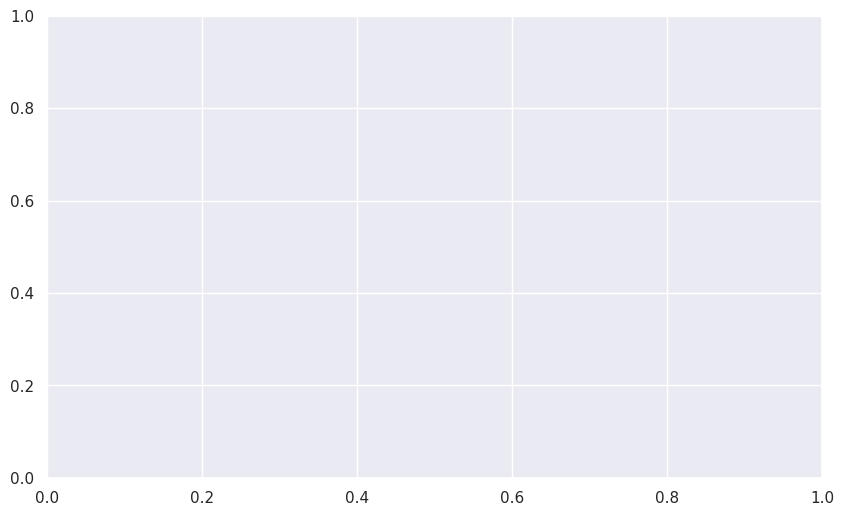

In [ ]:
# Создаем график
fig, ax = plt.subplots(figsize=(10, 6))

# Определяем диапазоны для цветов
color_range = unicorn_invest_growth_top_15['time_gap']
colors = ['darkviolet' if x > 10 else 'darkgreen' if 5 <= x <= 10 else 'gold' for x in color_range]

# Прозрачность цветов
alpha = 1.0

# Строим гистограмму
bars = plt.bar(unicorn_invest_growth_top_15.index, unicorn_invest_growth_top_15['growth_per_year'], color=colors, alpha=alpha)

# Создаем список объектов Patch для легенды
legend_patches = [mpatches.Patch(color='darkviolet', label='более 10 лет'),
                  mpatches.Patch(color='darkgreen', label='от 5 до 10 лет'),
                  mpatches.Patch(color='gold', label='менее 5 лет на рынке')]

# Настройка подписей осей
plt.xlabel('Инвестор')
plt.ylabel('Прибыль за год')
plt.title('Прибыль за год по топ-10 инвесторов')

# Поворот названий на оси x, чтобы они были читаемыми
plt.xticks(rotation=75)

# Добавляем легенду на график
plt.legend(handles=legend_patches, title='Количество лет на рынке')

# Отображение графика
plt.show()

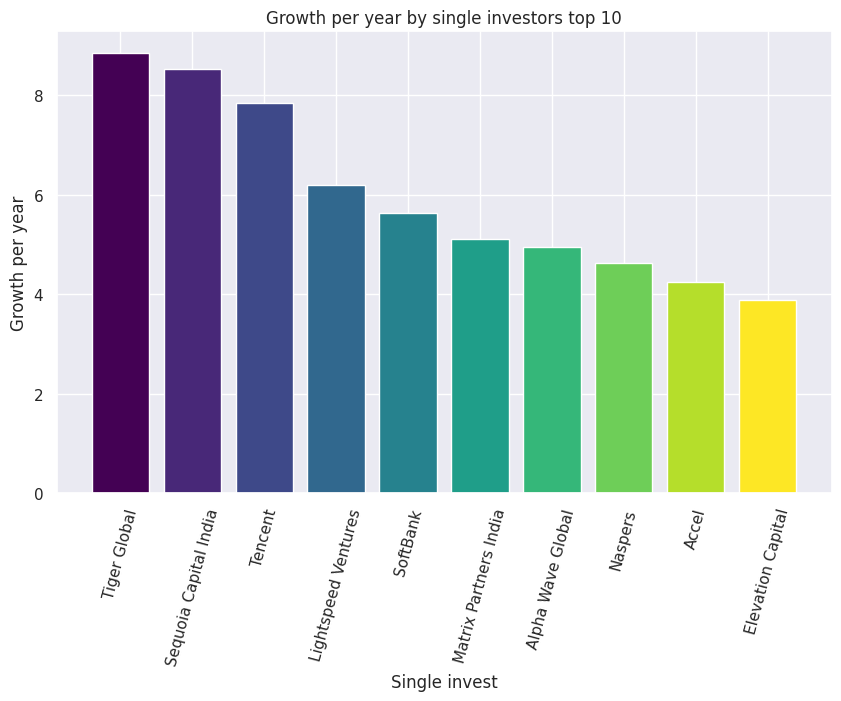

In [ ]:
# построим график для оценки ежегодного роста компаний (Возьмем топ-10 инвесторов):
unicorn_invest_growth_top_15 = unicorn_invest_growth.head(10)
# Создаем график
fig, ax = plt.subplots(figsize=(10, 6))

# цветовая карта
colors = cm.viridis(np.linspace(0, 1, len(unicorn_invest_growth_top_15.index)))

# Строим гистограмму
bars = plt.bar(unicorn_invest_growth_top_15.index, unicorn_invest_growth_top_15['growth_per_year'], color=colors)

# Настройка подписей осей
plt.xlabel('Single invest')
plt.ylabel('Growth per year')
plt.title('Growth per year by single investors top 10')



# Поворот названий на оси x, чтобы они были читаемыми
plt.xticks(rotation=75)

# Отображение графика
plt.show()

In [ ]:
# посмотим, сколько всего инвесторов с нулевой прибылью:
# отфильтруем строки с прибылью меньше или равной 0.00
filtered_df = unicorn_invest_growth[unicorn_invest_growth['growth_per_year'] <= 0.00]

# посчитаем количество строк в отфильтрованном датафрейме
filtered_df = len(filtered_df)

filtered_df

70

In [ ]:
#таких инвесторов 70! создадим для них отдельный датафрейм:
# создадим отдельный датафрейм unicorn_invest_zero, куда войдут все инвесторы с нулевым ежегодным доходом (или даже отрицательным):
unicorn_invest_zero = unicorn_invest_growth[unicorn_invest_growth['growth_per_year'] == 0.00]

unicorn_invest_zero.head()

,delta_val,entry,time_gap,growth_per_year
single_invest,,,,
Simile Venture Partners,0.0,2021-11-01,1.66,0.0
Bertelsmann India Investments,0.0,2021-08-01,1.91,0.0
Strive VC,0.0,2022-02-01,1.41,0.0
Beenos,0.0,2016-01-01,7.50,0.0
Beenos Partners,0.0,2021-07-01,2.00,0.0


In [ ]:

import plotly.express as px

# Создаем категории для growth_per_year
conditions = [
    (unicorn_invest_growth['growth_per_year'] > 0),
    (unicorn_invest_growth['growth_per_year'] == 0),
    (unicorn_invest_growth['growth_per_year'] < 0)
]

# Создаем значения для каждой категории
values = ['Положительная', 'Нулевая', 'Отрицательная']

# Добавляем новый столбец 'Группа'
unicorn_invest_growth['Group'] = np.select(conditions, values)

# Группировка по столбцу 'Группа'
grouped_data = unicorn_invest_growth.groupby('Group').size().reset_index(name='counts')

# Создание интерактивного pie plot
fig = px.pie(grouped_data, values='counts', names='Group', title='Группы компаний по ежегодной прибыли', hover_data=['Group'])
fig.show()

In [ ]:
# Слишком много инвесторов с нулевой прибылью. Хочу посмотреть на 10 самых
# долгоживущих на рынке (насколько валидная информация вопрос хороший, тк не
# знаем, когда закрылись компании):
unicorn_invest_zero.sort_values(by='time_gap', ascending=False)

,delta_val,entry,time_gap,growth_per_year
single_invest,,,,
KPCB,0.0,2011-09-01,11.83,0.0
Sherpalo Ventures,0.0,2011-09-01,11.83,0.0
Beenos,0.0,2016-01-01,7.50,0.0
Others,0.0,2016-01-01,7.50,0.0
Foxconn,0.0,2016-08-01,6.91,0.0
...,...,...,...,...
JSW Ventures,0.0,2022-06-01,1.08,0.0
QED Investors,0.0,2022-07-01,1.00,0.0
Lightrock India,0.0,2022-08-01,0.91,0.0


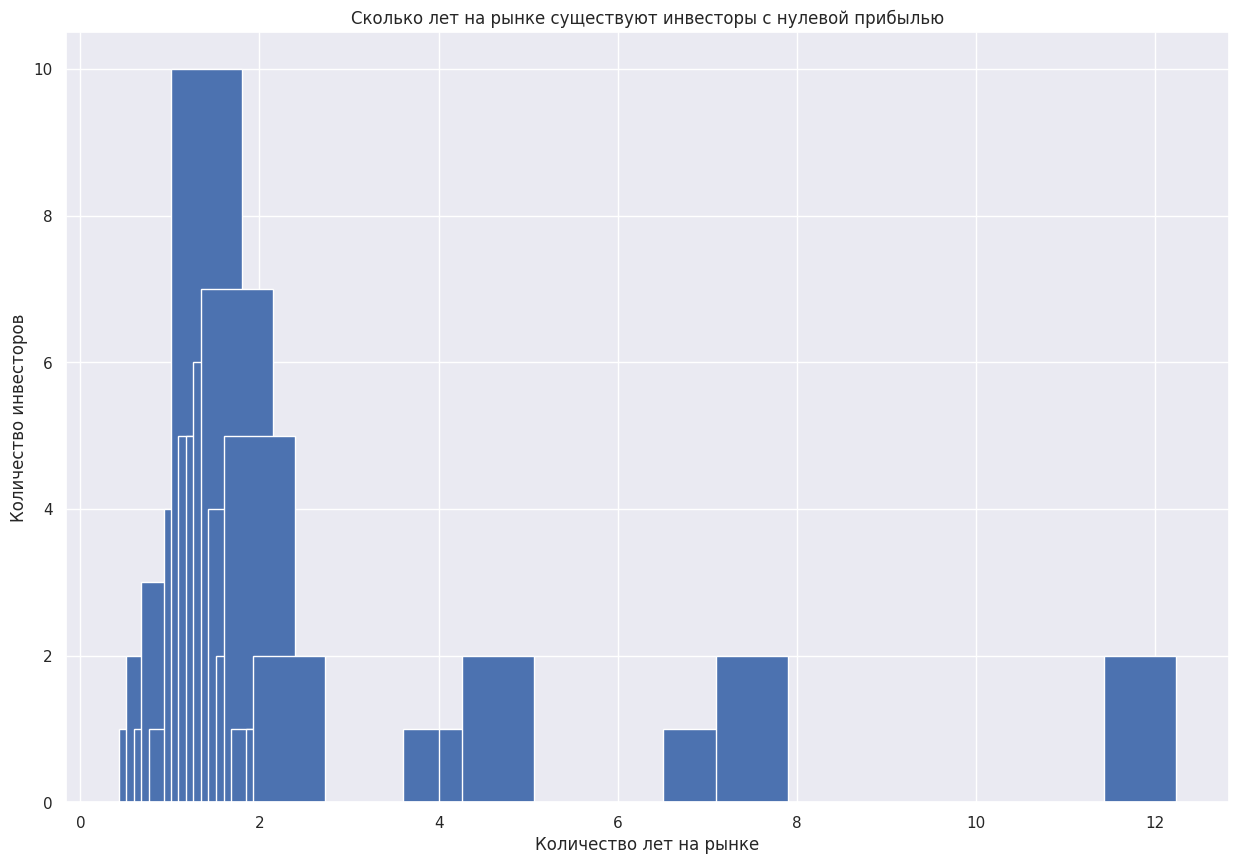

In [ ]:
# Оставь график ящика с усами и дай к нему коментарии, в этих СМЫСЛА ОСОБЕННОГО НЕТ, УДАЛИ
# сгрупировать графики - по круглым цифрам и вывести проценты, сколько на рынке они
# Создание датафрейма с количеством инвесторов и количеством лет на рынке
investor_years_df = unicorn_invest_zero.reset_index().groupby('time_gap')['single_invest'].count().reset_index()

# Строим график с помощью matplotlib
plt.bar(investor_years_df['time_gap'], investor_years_df['single_invest'])
plt.title('Сколько лет на рынке существуют инвесторы с нулевой прибылью')
plt.xlabel('Количество лет на рынке')
plt.ylabel('Количество инвесторов')
plt.show()

# Строим интерактивный график с помощью plotly
fig = px.bar(investor_years_df, x='time_gap', y='single_invest', labels={'time_gap': 'Количество лет на рынке', 'single_invest': 'Количество инвесторов'}, title="Сколько лет на рынке существуют инвесторы с нулевой прибылью")
fig.show()

In [ ]:
investor_years_df = unicorn_invest_zero.reset_index().groupby('single_invest')['time_gap'].max().reset_index()
# Строим boxplot с помощью plotly
fig = px.box(investor_years_df, y='time_gap', labels={'time_gap': 'Количество инвесторов'}, title="Распределение количества инвесторов с нулевой прибылью по количеству лет на рынке")
fig.update_layout(xaxis_title='Количество лет на рынке')

fig.show()

In [ ]:
# Создаем новый датафрейм с условием growth_per_year больше 0 и без столбца Group
unicorn_invest_not_zero = unicorn_invest_growth[unicorn_invest_growth['growth_per_year'] > 0].drop(columns=['Group'])
unicorn_invest_not_zero.head()

,delta_val,entry,time_gap,growth_per_year
single_invest,,,,
Tiger Global,100.848,2012-02-01,11.41,8.84
Sequoia Capital India,29.868,2020-01-01,3.50,8.53
Tencent,89.600,2012-02-01,11.41,7.85
Lightspeed Ventures,34.000,2018-01-01,5.49,6.19
SoftBank,66.768,2011-09-01,11.83,5.64


In [ ]:
# СДАЮСЬ САША ПОМОГИ! НЕ ПОНИМАЮ, КАК УБРАТЬ ПОДПИСИ КОМПАНИЙ ПО ШКАЛЕ У
# Создаем фрейм данных для Plotly
data = unicorn_invest_not_zero

# Отображаем интерактивный столбчатый график
fig = px.bar(data, x='growth_per_year', y=data.index, orientation='h', text='growth_per_year',
             labels={'growth_per_year': 'Годовой рост'}, title='Годовой рост инвестиций в компании',
             color='growth_per_year', color_continuous_scale=px.colors.diverging.RdYlBu)

fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

fig.update_layout(xaxis_title='Годовой рост',
                  yaxis={'categoryorder':'total ascending', 'title': ''},
                  coloraxis_colorbar_title='Годовой рост')

fig.update_yaxes(visible=False, showticklabels=False)

# Option-2: using fig.update_layout()
#fig.update_layout(yaxis={'visible': False, 'showticklabels': False})

# Option-3: using fig.update_layout() + dict-flattening shorthand
fig.update_layout(yaxis_visible=False, yaxis_showticklabels=False)

fig.show()

# заголовок вынеси посередине и долбавь заголовок к оси у, непонятно, пока не наведешь
# yaxis_showticklabels - подписи к графикам убирать/оставлять

Мы создали датафрейм, в котором выделим каждого инвестора из группы. По суммарной прибыли за все время существования на рынке мы выделили топ-5 инвесторов: Tiger Global с 100.848 , Tencent c 89.600, SoftBank 77.768, Naspers 52.800, а замыкает список Accel 48.400. Все эти инвесторы появились на рынке в 2011-2012 годах. Посмотрим на ежегодную прибыль: в топ 10 по ежегодной прибыли так же вошли топ-5 инвесторов, а меньше всего представлено компаний, которые на рынке от 5 до 10 лет.
Далее изучаем инвесторов с нулевой прибылью. В нашем датафрейме оказалось 70 таких инвесторов (чуть меньше половины) и даже одна компания с отрицательной прибылью. Поскольку у нас нет информации о закрытии компаний, мы можем предположить, что такие инвесторы так же существуют на рынке длительное время: до 7 (2 инвестора) и даже более 11 лет(2 инвестора).
По итоговой гистограмме (исключили из датафрейма копании с нулевой прибылью) мы видим, что шкала с годовым ростом инвестиций в районе 1.5-4 наиболее протяженная, а пик с годовыми инвестициями более 8 достаточно узкий.

#### Картографическая визуализация данных
Теперь вернемся к исходному датафрейму: построим карту, на которой отметим города, в которых открывались 15 самых прибыльных стартапов. Работу проведем в датафрейме unicorn_map


In [ ]:
unicorn_map = unicorn_copy.copy()
unicorn_map = unicorn_map[['company', 'sector_groups', 'delta_val', 'select_invest', 'loc', 'entry']]

# оставим в столбце loc первый город:
unicorn_map['loc'] = unicorn_map['loc'].apply(lambda x: x.split('/')[0].strip())
unicorn_map_top_15 = unicorn_map.sort_values(by = 'delta_val', ascending=False).head(15)
unicorn_map_top_15['loc'].unique()

array(['Bangalore', 'Noida', 'Mumbai', 'Gurgaon', 'Pune'], dtype=object)

In [ ]:
# добавим в наш датафрейм координаты городов:
city_coordinates = {
    'Bangalore': {'latitude': 12.9716, 'longitude': 77.5946},
    'Noida': {'latitude': 28.5355, 'longitude': 77.3910},
    'Mumbai': {'latitude': 19.0760, 'longitude': 72.8777},
    'Gurgaon': {'latitude': 28.4595, 'longitude': 77.0266},
    'Pune': {'latitude': 18.5204, 'longitude': 73.8567}
}

def get_coordinates(city):
    if city in city_coordinates:
        return pd.Series(city_coordinates[city])
    else:
        return pd.Series({'latitude': None, 'longitude': None})

unicorn_map_top_15 = unicorn_map_top_15.merge(unicorn_map_top_15['loc'].apply(get_coordinates), left_index=True, right_index=True).reset_index().drop(columns=['index', 'level_0'])
unicorn_map_top_15.head()

,company,sector_groups,delta_val,select_invest,loc,entry,latitude_x,longitude_x,latitude_y,longitude_y,latitude_x,longitude_x,latitude_y,longitude_y,latitude,longitude
0,Flipkart^,Commerce,36.6,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore,2012-02-01,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946
1,BYJUS,Edtech,21.0,"Aarin Capital, Sequoia Capital, Lightspeed Ven...",Bangalore,2018-01-01,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946
2,PayTM^,Fintech,14.3,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida,2015-02-01,28.5355,77.3910,28.5355,77.3910,28.5355,77.3910,28.5355,77.3910,28.5355,77.3910
3,Swiggy,Foodtech,9.3,"Accel, Elevation Capital, Norwest, Naspers, Te...",Bangalore,2018-06-01,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946,12.9716,77.5946
4,Dream11,Gaming,7.0,"Kalaari Capital, Tencent, Multiples PE, Steadv...",Mumbai,2019-04-01,19.0760,72.8777,19.0760,72.8777,19.0760,72.8777,19.0760,72.8777,19.0760,72.8777


In [ ]:
city_coordinates = {
    'Bangalore': {'latitude': 12.9716, 'longitude': 77.5946},
    'Noida': {'latitude': 28.5355, 'longitude': 77.3910},
    'Mumbai': {'latitude': 19.0760, 'longitude': 72.8777},
    'Gurgaon': {'latitude': 28.4595, 'longitude': 77.0266},
    'Pune': {'latitude': 18.5204, 'longitude': 73.8567}
}

# Строим карту
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Добавляем маркеры для каждой компании в каждом городе
for index, row in unicorn_map_top_15.iterrows():
    city = row['loc']
    company = row['company']
    delta_val = row['delta_val']
    coords = city_coordinates[city]

    # Определяем значок в зависимости от delta_val
    icon = 'paw'

    # Определяем цвет значка в зависимости от delta_val
    if delta_val > 10:
        icon_color = 'red'
    elif delta_val > 5:
        icon_color = 'green'
    else:
        icon_color = 'blue'

     # Увеличиваем случайное смещение к координатам для увеличения расстояния между маркерами
    offset = (random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5))
    location = [coords['latitude'] + offset[0], coords['longitude'] + offset[1]]

      # Добавляем маркер с определенным значком и цветом
    folium.Marker(location=location, popup=f'{company}: {delta_val}',
                  icon=folium.Icon(color=icon_color, icon=icon, prefix='fa')).add_to(map)
map

# добавь легенду и сделай меньше offset и добавь подпись, что есть смещение точек для того , тчобы было видно все комапнии, на деле не смотря на смещение принадлежат одному городу

In [ ]:
#а теперь выведем топ 15 инвесторов, в которых самый большой ежегодный прирост
# прибыли (мы отталкиваемся от гипотезы, что стартапы на момент окончания
#наблюдений - июнь 2023 года еще существуют)
unicorn_map.head()
end_of_observations = pd.to_datetime('2023-07-01')
unicorn_map['time_gap'] = (end_of_observations - unicorn_map['entry']) / pd.Timedelta(days=365.25)

unicorn_map['time_gap'] = round(unicorn_map['time_gap'], 2)
unicorn_map_growth_15 = unicorn_map.sort_values(by = 'time_gap', ascending=False)


unicorn_map_growth_15['growth_per_year'] = unicorn_map_growth_15['delta_val'] / unicorn_map_growth_15['time_gap']
unicorn_map_growth_15['growth_per_year'] = round(unicorn_map_growth_15['growth_per_year'], 2)
unicorn_map_growth_15 = unicorn_map_growth_15.sort_values(by = 'growth_per_year', ascending=False).head(15)
unicorn_map_growth_15 = unicorn_map_growth_15.reset_index(drop=True)
unicorn_map_growth_15.head()

,company,sector_groups,delta_val,select_invest,loc,entry,time_gap,growth_per_year
0,BYJUS,Edtech,21.0,"Aarin Capital, Sequoia Capital, Lightspeed Ven...",Bangalore,2018-01-01,5.49,3.83
1,Flipkart^,Commerce,36.6,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore,2012-02-01,11.41,3.21
2,PhonePe^,Fintech,6.5,"Tiger Global, Tencent",Bangalore,2020-12-01,2.58,2.52
3,RazorPay,Fintech,6.5,"Matrix Partners India, Tiger Global, Sequoia C...",Bangalore,2020-10-01,2.75,2.36
4,CRED,Fintech,4.2,"Sequoia Capital India, Ribbit Capital, DST Glo...",Bangalore,2021-04-01,2.25,1.87


In [ ]:
# так же добавим координаты:
city_coordinates = {
    'Bangalore': {'latitude': 12.9716, 'longitude': 77.5946},
    'Noida': {'latitude': 28.5355, 'longitude': 77.3910},
    'Mumbai': {'latitude': 19.0760, 'longitude': 72.8777},
    'Gurgaon': {'latitude': 28.4595, 'longitude': 77.0266},
    'Pune': {'latitude': 18.5204, 'longitude': 73.8567}
}

def get_coordinates(city):
    if city in city_coordinates:
        return pd.Series(city_coordinates[city])
    else:
        return pd.Series({'latitude': None, 'longitude': None})

unicorn_map_growth_15 = unicorn_map_growth_15.merge(unicorn_map_growth_15['loc'].apply(get_coordinates), left_index=True, right_index=True)
unicorn_map_growth_15.head()

,company,sector_groups,delta_val,select_invest,loc,entry,time_gap,growth_per_year,latitude,longitude
0,BYJUS,Edtech,21.0,"Aarin Capital, Sequoia Capital, Lightspeed Ven...",Bangalore,2018-01-01,5.49,3.83,12.9716,77.5946
1,Flipkart^,Commerce,36.6,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore,2012-02-01,11.41,3.21,12.9716,77.5946
2,PhonePe^,Fintech,6.5,"Tiger Global, Tencent",Bangalore,2020-12-01,2.58,2.52,12.9716,77.5946
3,RazorPay,Fintech,6.5,"Matrix Partners India, Tiger Global, Sequoia C...",Bangalore,2020-10-01,2.75,2.36,12.9716,77.5946
4,CRED,Fintech,4.2,"Sequoia Capital India, Ribbit Capital, DST Glo...",Bangalore,2021-04-01,2.25,1.87,12.9716,77.5946


In [ ]:
# Строим карту
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Добавляем маркеры для каждой компании в каждом городе
for index, row in unicorn_map_growth_15.iterrows():
    city = row['loc']
    company = row['company']
    growth_per_year = row['growth_per_year']
    coords = city_coordinates[city]

    # Определяем значок в зависимости от growth_per_year
    icon = 'paw'

    # Определяем цвет значка в зависимости от growth_per_year
    if growth_per_year > 2:
        icon_color = 'red'
    elif growth_per_year > 1.5:
        icon_color = 'green'
    else:
        icon_color = 'blue'

     # Увеличиваем случайное смещение к координатам для увеличения расстояния между маркерами
    offset = (random.uniform(-0.6, 0.6), random.uniform(-0.6, 0.6))
    location = [coords['latitude'] + offset[0], coords['longitude'] + offset[1]]

      # Добавляем маркер с определенным значком и цветом
    folium.Marker(location=location, popup=f'{company}: {growth_per_year}',
                  icon=folium.Icon(color=icon_color, icon=icon, prefix='fa')).add_to(map)
map

# добавь легенду и выведи топ 15 инвесторов с наибольшим количество стартапов
# по городам: первый прям в первый город маркер ведет, второй со смещением на 1 в этот же город, и тд, напиши функцию

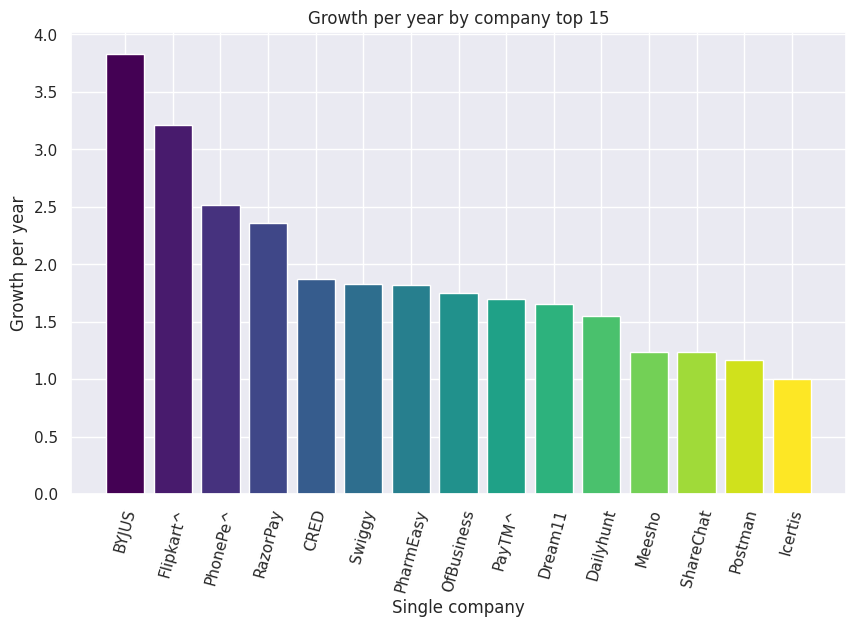

In [ ]:
# построим график для оценки ежегодного роста компаний (Возьмем топ-15 инвесторов):
unicorn_map_growth_15
# Создаем график
plt.figure(figsize=(10, 6))
# цветовая карта
colors = cm.viridis(np.linspace(0, 1,  len(unicorn_map_growth_15['company'])))

# Строим гистограмму
plt.bar(unicorn_map_growth_15['company'], unicorn_map_growth_15['growth_per_year'], color=colors)

# Настройка подписей осей
plt.xlabel('Single company')
plt.ylabel('Growth per year')
plt.title('Growth per year by company top 15')

# Поворот названий на оси x, чтобы они были читаемыми
plt.xticks(rotation=75)

# Отображение графика
plt.show()

# colorscale - цвет отображает показатели на оси у
# цветовое пано - colorbar

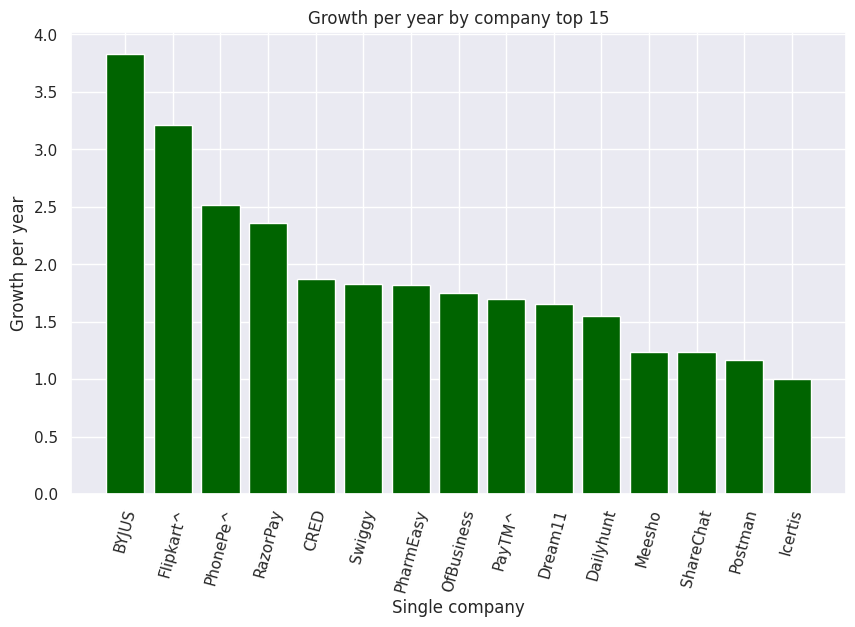

In [ ]:
# Создаем график
plt.figure(figsize=(10, 6))

# Строим гистограмму с темно-зелеными столбцами, используя палитру 'Greens'
plt.bar(unicorn_map_growth_15['company'], unicorn_map_growth_15['growth_per_year'], color='darkgreen')

# Настройка подписей осей
plt.xlabel('Single company')
plt.ylabel('Growth per year')
plt.title('Growth per year by company top 15')

# Поворот названий на оси x, чтобы они были читаемыми
plt.xticks(rotation=75)

# Отображение графика
plt.show()

Вывод: мы определили города, в которых открывалось топ-15 стартапов (по ежегодной и суммарной прибыли): Bangalore, Noida, Mumbai, 'Gurgaon, Pune. Отобразив данные на карте видим, что подавляющее число стартапов открывалось именно  в Bangalore. Точки на самой карте могут быть нанесены с некоторым удалением от центров городов.